In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
data=pd.read_csv("Social_Network_Ads.csv")

In [18]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [21]:
data1=data.drop(columns=["User ID"])

In [22]:
X=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values

In [23]:
X[0]

array(['Male', 19, 19000], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])


In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test=train_test_split(X ,y ,test_size=0.2 ,random_state=0)

In [30]:
X_train.shape

(320, 3)

In [27]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Dense ,Dropout ,LayerNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu ,selu, sigmoid
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model=Sequential()
model.add(layers.Dense(32 , activation="relu" , input_shape=(3,)))
model.add(layers.Dense(64 , activation="relu"))
model.add(layers.Dense(128 , activation="relu"))
model.add(layers.Dense(128 , activation="relu"))
model.add(layers.Dense(1 , activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer="adam" , loss="binary_crossentropy" ,metrics=['accuracy'])

In [47]:
history=model.fit(X_train ,y_train ,batch_size=32 ,epochs=30 ,verbose=1 ,validation_data=(X_test ,y_test) ,validation_split=0.2)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9089 - loss: 0.2477 - val_accuracy: 0.9500 - val_loss: 0.1779
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9331 - loss: 0.2216 - val_accuracy: 0.9500 - val_loss: 0.1702
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9052 - loss: 0.2503 - val_accuracy: 0.9500 - val_loss: 0.1568
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8939 - loss: 0.2590 - val_accuracy: 0.9500 - val_loss: 0.1477
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9217 - loss: 0.2283 - val_accuracy: 0.9625 - val_loss: 0.1423
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9034 - loss: 0.2404 - val_accuracy: 0.9625 - val_loss: 0.1396
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9172 - loss: 0.2417 - val_accuracy: 0.9625 - val_loss: 0.1376
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9363 - loss: 0.2112 - val_accuracy: 0.9625 - val_

In [49]:
accuracy=history.history["accuracy"]
val_accuracy=history.history["val_accuracy"]
val_loss=history.history["val_loss"]
loss=history.history["loss"]

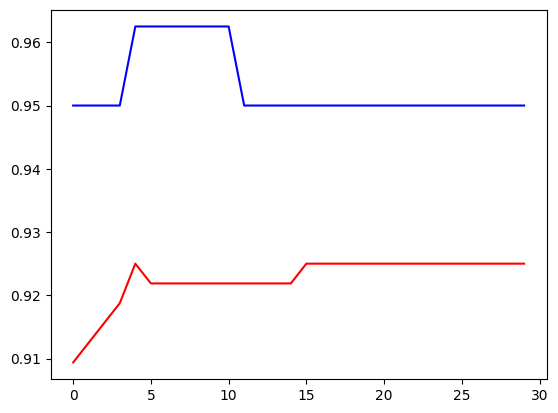

In [59]:
plt.plot(history.history["accuracy"] , color='r' )
plt.plot(history.history["val_accuracy"] ,color="b")

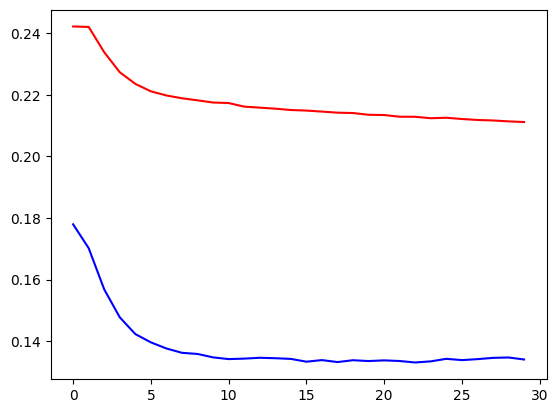

In [60]:
plt.plot(history.history["loss"] , color='r' )
plt.plot(history.history["val_loss"] ,color="b")

In [63]:
y_pred=model.predict(X_test)
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [64]:
from sklearn.metrics import classification_report , accuracy_score
accuracy=accuracy_score(y_pred_binary,y_test)

In [65]:
accuracy

0.95

In [68]:
X_new = [[0 ,19	,19000]]
scaled_new=sc.fit_transform(X_new)

In [73]:
pred=model.predict(scaled_new)
y_new_pred_binary = np.where(pred >= 0.5, "yes", "no")
print(y_new_pred_binary)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[['no']]
